# Introduction to Deep Learning - Formula 1 Car Recognition using CNN

## 1. Setup and Load Data

### 1.1 Importing Dependencies

In [ ]:
# !pip install split-folders

In [ ]:
import tensorflow as tf
import os
import cv2 as cv
import imghdr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# import splitfolders

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.applications import VGG16


In [ ]:
## Avoid out of memory error by setting GPU Memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if not gpus:
    print("No GPU available")
else:
    # Set memory growth for each available GPU
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")

No GPU available


### 1.2 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/archive/Formula One Cars/Formula One Cars'
split_dir = '/content/drive/MyDrive/archive/Formula One Cars/F1 Cars Split'

In [ ]:
os.listdir(data_dir)

['Renault F1 car',
 'Red Bull Racing F1 car',
 'AlphaTauri F1 car',
 'Ferrari F1 car',
 'Williams F1 car',
 'Mercedes F1 car',
 'McLaren F1 car',
 'Racing Point F1 car',
 'Alpha Romeo F1 Car',
 'Haas F1 Car']

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) #Builds the image dataset for us on the fly, no need to build labels nor the classes

Found 3311 files belonging to 10 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

The above function also can perform necessary preprocessing for our image

In [ ]:
data_iterator = data.as_numpy_iterator() #this will let us allow us to access the data pipeline generator / images from the data

In [ ]:
batch = data_iterator.next()

In [ ]:
# Images represented as numpy arrays
batch[0]

array([[[[1.03843750e+02, 7.88437500e+01, 4.78437500e+01],
         [9.70312500e+01, 7.00312500e+01, 4.00312500e+01],
         [9.40312500e+01, 6.70312500e+01, 3.70312500e+01],
         ...,
         [3.25000000e+00, 9.25000000e+00, 2.12500000e+01],
         [0.00000000e+00, 1.10937500e+01, 2.27187500e+01],
         [9.68750000e+00, 2.59375000e+01, 5.63125000e+01]],

        [[1.06062500e+02, 7.96250000e+01, 4.93437500e+01],
         [9.95000000e+01, 7.33750000e+01, 4.07500000e+01],
         [1.09625000e+02, 8.31250000e+01, 5.28750000e+01],
         ...,
         [1.34375000e+00, 1.03437500e+01, 1.93437500e+01],
         [1.75000000e+00, 1.48750000e+01, 2.43750000e+01],
         [1.66875000e+01, 3.26875000e+01, 6.56875000e+01]],

        [[1.04656250e+02, 7.96562500e+01, 4.86562500e+01],
         [1.01468750e+02, 7.44687500e+01, 4.44687500e+01],
         [1.02968750e+02, 7.59687500e+01, 4.59687500e+01],
         ...,
         [2.03125000e+00, 1.00312500e+01, 2.10312500e+01],
         [

In [ ]:
# labels represented as numpy arrays
batch[1]

array([9, 0, 3, 3, 9, 3, 6, 6, 2, 3, 3, 6, 3, 3, 5, 4, 0, 0, 0, 0, 1, 0,
       4, 9, 1, 3, 8, 2, 8, 6, 5, 6], dtype=int32)

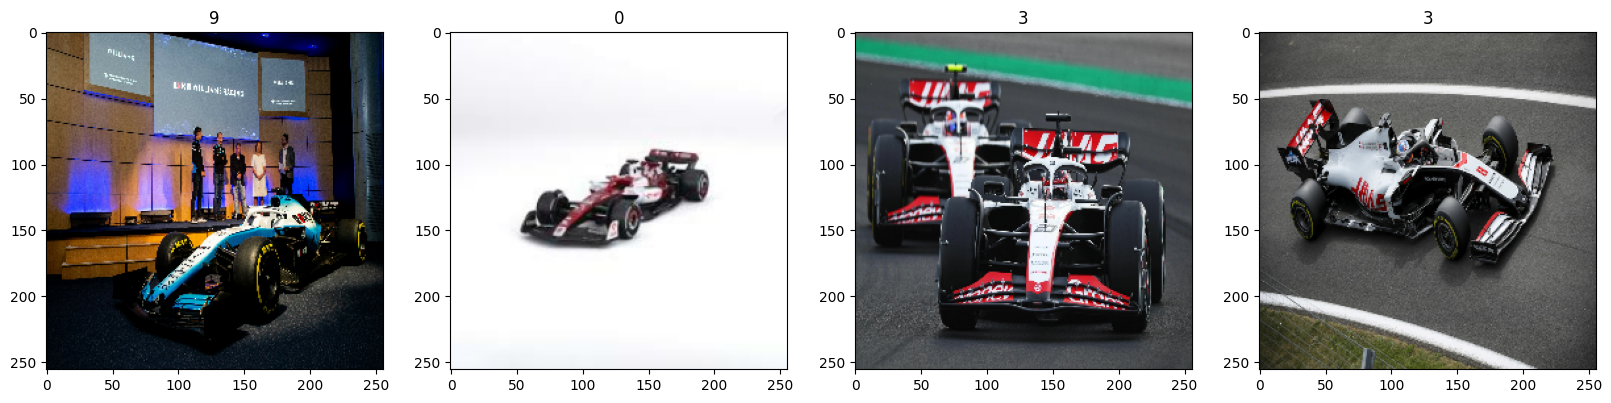

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


Classes:

0 - Alpha Romeo F1 Car

1 - AlphaTauri F1 car

2 - Ferrari F1 car

3 - Haas F1 Car

4 - McLaren F1 car

5 - Mercedes F1 car

6 - Racing Point F1 car

7 - Red Bull Racing F1 car

8 - Renault F1 car

9 - Williams F1 car

###1.3 Split data - train test split

train data is balanced

In [ ]:
train_dir = split_dir + '/balanced_train_data/'
val_dir = split_dir + '/val/'
test_dir = split_dir + '/test/'

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir) # Builds the image dataset for us, no need to build labels nor the classes
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

Found 4453 files belonging to 10 classes.
Found 662 files belonging to 10 classes.
Found 339 files belonging to 10 classes.


###1.4 Scaling data

In [ ]:
# now the features will be between 0-1
train_data = train_data.map(lambda x, y: (x/255, y))
val_data = val_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

# resize images
train_data = train_data.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
val_data = val_data.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
test_data = test_data.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

In [ ]:
train_data_iterator = train_data.as_numpy_iterator() #this will let us allow us to access the data pipeline generator / images from the data
val_data_iterator = val_data.as_numpy_iterator()
test_data_iterator = test_data.as_numpy_iterator()

In [ ]:
train_batch = train_data_iterator.next()

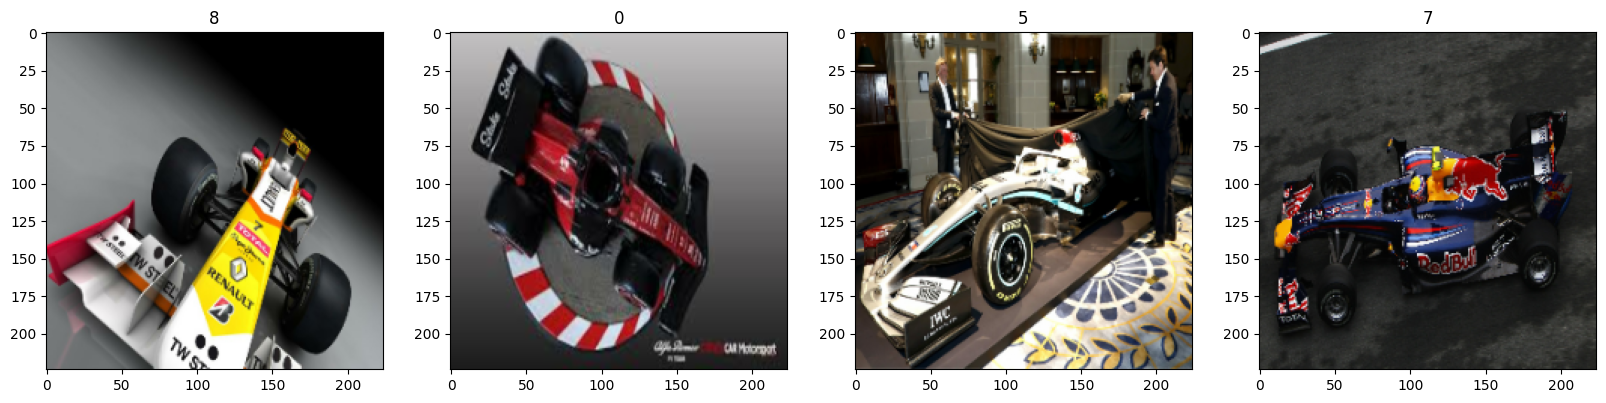

In [ ]:
fix, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(train_batch[1][idx])

## Model Training

In [ ]:
# # Load pre-trained VGG16 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# # Modify the architecture to accept input images of size 256x256
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)  # Rescale pixel values to [0, 1]
# x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(x)  # Resize images to 224x224
# outputs = base_model(x)

In [ ]:
# # Fine-tune the model
# base_model.trainable = True
# fine_tune_at = 15  # Choose the layer from which you want to fine-tune
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

In [ ]:
# # Add classification layers
# x = tf.keras.layers.GlobalAveragePooling2D()(outputs)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # num of classes = 10

In [ ]:
# # Create the model
# model = tf.keras.Model(inputs, outputs)

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# # Train the model
# history = model.fit(train_data, validation_data=val_data, epochs=10)

In [ ]:
# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(test_data)
# print("Test Accuracy:", test_accuracy)


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# # Predict labels for test data
# y_pred = model.predict(test_data)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Get true labels from test dataset
# true_labels = []
# for images, labels in test_data:
#     true_labels.extend(labels.numpy())

# # Compute classification report
# print("Classification Report:")
# print(classification_report(true_labels, y_pred_classes))

# # Compute confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(true_labels, y_pred_classes))


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16

# # Load pre-trained VGG16 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Fine-tune the model
# base_model.trainable = True
# fine_tune_at = 15  # Choose the layer from which you want to fine-tune
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

# # Add classification layers
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)  # Rescale pixel values to [0, 1]

# # Resize images to 224x224
# x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(x)

# # Apply batch normalization
# x = tf.keras.layers.BatchNormalization()(x)

# outputs = base_model(x)

# x = tf.keras.layers.GlobalAveragePooling2D()(outputs)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)  # Dropout for regularization
# outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# # Add L2 weight decay
# wd = 1e-4  # Weight decay factor
# for layer in base_model.layers:
#     if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.Dense):
#         layer.kernel_regularizer = tf.keras.regularizers.l2(wd)

# # Create the model
# model = tf.keras.Model(inputs, outputs)

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(train_data, validation_data=val_data, epochs=10)

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(test_data)
# print("Test Accuracy:", test_accuracy)


In [ ]:
# vgg_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
# vgg_base.trainable = False

In [ ]:
# inputs = tf.keras.Input(shape=(224, 224, 3))

# x = vgg_base(inputs, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# outputs = tf.keras.layers.Dense(50, activation = 'sigmoid')(x)
# vgg_model = tf.keras.Model(inputs, outputs)
# vgg_model.summary

In [ ]:
# vgg_model.compile(
#     optimizer = tf.keras.optimizers.Adam(),
#     loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
#     metrics = [tf.keras.metrics.CategoricalAccuracy()],
# )

In [ ]:
# epochs = 25
# vgg_model.fit(train_data, epochs=epochs, validation_data=val_data)

In [ ]:
# vgg_model.save('vgg.hdf5') #this saves the model with the weights

akes the preprocessed input images, applies the base model (MobileNetV2) to extract features, then adds a global average pooling layer to reduce spatial dimensions.

Global Average Pooling is chosen to reduce the spatial dimensions of the features extracted by the base model.
Alternative Options: Different architectures or additional layers (e.g., dropout layers) could be experimented with to improve performance or adapt to specific requirements.

(There are 2 different types of pooling layers - MAX pooling layer and AVG pooling layer. As the names suggest the MAX pooling layer picks maximum values from the convoluted feature maps and AVG pooling layer takes the average value of the features from the feature maps.)



After that, a fully connected dense layer with ReLU activation is added, followed by the output layer with softmax activation for multi-class classification.

compiled with the Adam optimizer, sparse categorical cross-entropy loss function (suitable for integer-encoded target labels), and accuracy as the evaluation metric

The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks. Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.

categorical_crossentropy - one-hot encoded containing the probable match for each category,
sparse_categorical_crossentropy - category index of the most likely matching category. labels are integer encoded

"Cross-Entropy Loss is also known as logarithmic loss, log loss or logistic loss. Each probability of the predicted class is compared with the actual class and loss is calculated which penalizes the probability based on how far it is from the actual expected value. The penalty is logarithmic in nature yielding a large score for large differences close to 1 and small score for small differences tending to 0. A perfect model has a cross-entropy loss of 0."

In [ ]:
import tensorflow as tf

# Define a simpler base model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent the pretrained feature extractor from being altered.
base_model.trainable = False

# Create the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(50, activation='softmax')(x)

# Compile the model
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 5  # Reduced number of epochs
history = model.fit(train_data, epochs=epochs, validation_data=val_data)


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
140/140 [==============================] - 716s 5s/step - loss: 1.9750 - accuracy: 0.3735 - val_loss: 1.4504 - val_accuracy: 0.5363
Epoch 2/5
140/140 [==============================] - 311s 2s/step - loss: 1.1587 - accuracy: 0.6486 - val_loss: 1.1687 - val_accuracy: 0.6088
Epoch 3/5
140/140 [==============================] - 308s 2s/step - loss: 0.9088 - accuracy: 0.7276 - val_loss: 1.0627 - val_accuracy: 0.6284
Epoch 4/5
140/140 [==============================] - 315s 2s/step - loss: 0.7661 - accuracy: 0.7777 - val_loss: 0.9986 - val_accuracy: 0.6677
Epoch 5/5
140/140 [==============================] - 304s 2s/step - loss: 0.6633 - accuracy: 0.8199 - val_loss: 0.9482 - val_accuracy: 0.6782


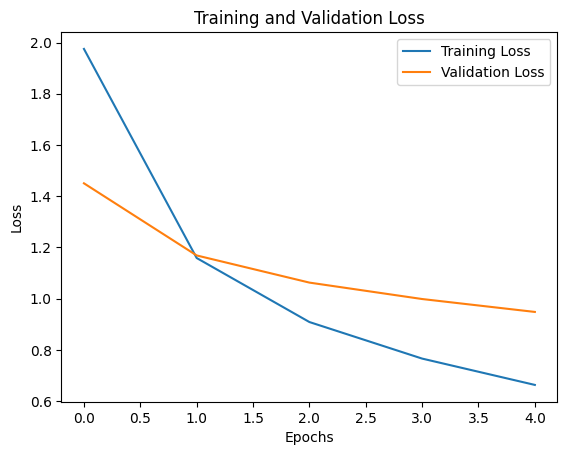

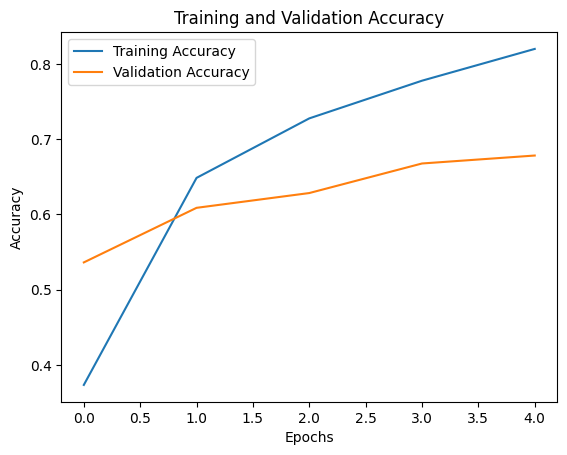

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
history = model.history

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


11/11 [==============================] - 23s 1s/step


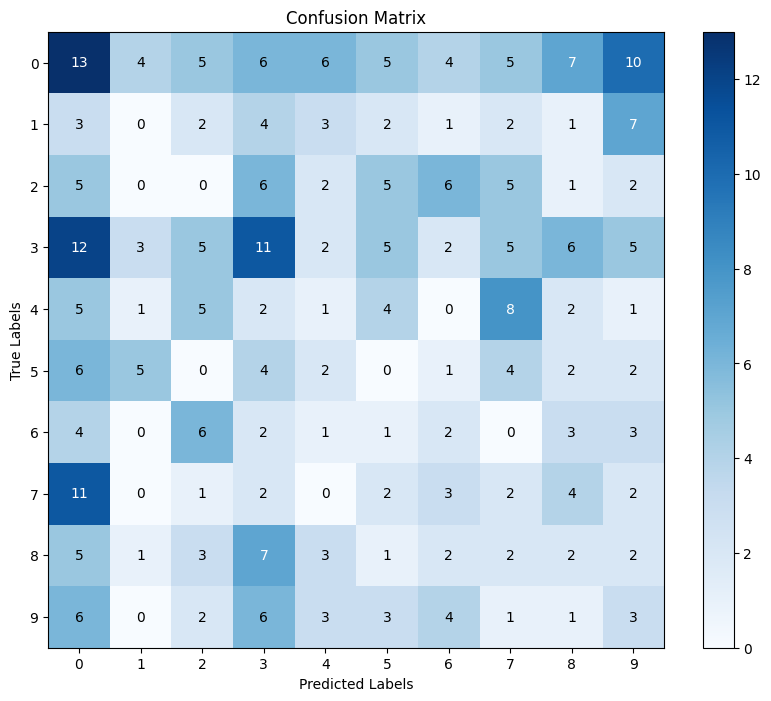

Classification Report:
              precision    recall  f1-score   support

           0     0.1857    0.2000    0.1926        65
           1     0.0000    0.0000    0.0000        25
           2     0.0000    0.0000    0.0000        32
           3     0.2200    0.1964    0.2075        56
           4     0.0435    0.0345    0.0385        29
           5     0.0000    0.0000    0.0000        26
           6     0.0800    0.0909    0.0851        22
           7     0.0588    0.0741    0.0656        27
           8     0.0690    0.0714    0.0702        28
           9     0.0811    0.1034    0.0909        29

    accuracy                         0.1003       339
   macro avg     0.0738    0.0771    0.0750       339
weighted avg     0.0982    0.1003    0.0988       339



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

test_preds = model.predict(test_data)
test_lbls = np.concatenate([y for x, y in test_data], axis=0)

# Ensure consistent lengths of true and predicted labels
min_length = min(len(test_lbls), len(test_preds))
test_lbls = test_lbls[:min_length]
test_preds = test_preds[:min_length]

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_lbls, np.argmax(test_preds, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()

# Print classification report
print("Classification Report:")
class_report = classification_report(test_lbls, np.argmax(test_preds, axis=1), digits=4)
print(class_report)


In [ ]:
train_loss, train_accuracy = model.evaluate(train_data)
print('Train accuracy:', train_accuracy)

# Test accuracy
test_loss, test_accuracy = model.evaluate(test_data)
print('Test accuracy:', test_accuracy)

140/140 [==============================] - 269s 2s/step - loss: 0.5846 - accuracy: 0.8482
Train accuracy: 0.8481922149658203
11/11 [==============================] - 20s 1s/step - loss: 0.9389 - accuracy: 0.7080
Test accuracy: 0.7079645991325378


In [ ]:
# # Import necessary modules
# import tensorflow as tf
# from tensorflow.keras.layers import Dropout

# # Define the base model
# base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model layers
# base_model.trainable = False

# # Create the model
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = base_model(inputs, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)  # Add dropout for regularization
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# outputs = tf.keras.layers.Dense(50, activation='softmax')(x)

# # Compile the model
# model = tf.keras.Model(inputs, outputs)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# epochs = 15  # Increase number of epochs
# history = model.fit(train_data, epochs=epochs, validation_data=val_data)


In [ ]:
# import tensorflow as tf

# # Define a simpler base model
# base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model layers
# base_model.trainable = False

# # Create the model
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = base_model(inputs, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# # Add Dropout regularization
# x = tf.keras.layers.Dropout(0.5)(x)  # Dropout with 50% probability
# outputs = tf.keras.layers.Dense(50, activation='softmax')(x)

# # Compile the model
# model = tf.keras.Model(inputs, outputs)
# # Use a lower learning rate
# initial_learning_rate = 1e-4
# optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
# # Apply learning rate scheduling
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
# )
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=3, restore_best_weights=True
# )

# # Train the model with regularization and optimization techniques
# epochs = 10
# history = model.fit(train_data, epochs=epochs, validation_data=val_data, callbacks=[early_stopping])


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16

# # Load pre-trained VGG16 model (excluding the top layer)
# vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# vgg_base.trainable = False

# # Add batch normalization and dropout for regularization
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)  # Rescale pixel values to [0, 1]
# x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(x)  # Resize images to 224x224
# x = tf.keras.layers.BatchNormalization()(x)  # Batch normalization layer
# x = vgg_base(x, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)  # Dropout for regularization
# outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# # Create the model
# vgg_model = tf.keras.Model(inputs, outputs)

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Adjust learning rate
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
# vgg_model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

# # Train the model
# epochs = 10  # Adjust epochs as needed
# history = vgg_model.fit(train_data, epochs=epochs, validation_data=val_data)

# # Evaluate the model on test data
# test_loss, test_accuracy = vgg_model.evaluate(test_data)
# print("Test Accuracy:", test_accuracy)